In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from matplotlib.font_manager import FontProperties

mission_launches_cleaned = pd.read_csv(r"C:\Users\photo\Desktop\Ironhack\projects\project_II_space_mission_launches\data\mission_launches_cleaned.csv", encoding='latin1')
mission_launches_cleaned.head()

,Agency,Location,Date,Detail,Rocket_Status,Price in Millions,Mission_Status,Month,Year,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,Active,50.0,Success,2020-08,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06,Long March 2D | Gaofen-9 04 & Q-SAT,Active,29.75,Success,2020-08,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04,Starship Prototype | 150 Meter Hop,Active,20,Success,2020-08,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,Active,65.0,Success,2020-07,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30,Atlas V 541 | Perseverance,Active,145.0,Success,2020-07,2020,USA


In [3]:
mission_extra_cleaned = pd.read_csv(r"C:\Users\photo\Desktop\Ironhack\projects\project_II_space_mission_launches\data\mission_extra_cleaned.csv")
mission_extra_cleaned.head()

,Agency,Location,Date,Detail,Rocket_Status,Price in Millions,Mission_Status,Month,Year_x,Country,Budget in Millions,Year_y
0,JAXA,"LA-Y1, Tanegashima Space Center, Japan",2020-07-19,H-IIA 202 | Hope Mars Mission,Active,90.0,Success,2020-07,2020,Japan,2388,2022
1,JAXA,"Mu Pad, Uchinoura Space Center, Japan",2019-01-18,Epsilon PBS | Innovative Satellite Technology ...,Active,39.0,Success,2019-01,2019,Japan,2388,2022
2,JAXA,"Uchinoura Space Center, Japan",2018-02-03,SS-520 | Tricom-1R,Active,NaN,Success,2018-02,2018,Japan,2388,2022
3,JAXA,"Mu Pad, Uchinoura Space Center, Japan",2018-01-17,Epsilon PBS | ASNARO 2,Active,39.0,Success,2018-01,2018,Japan,2388,2022
4,JAXA,"Uchinoura Space Center, Japan",2017-01-14,SS-520 | TRICOM-1,Active,NaN,Failure,2017-01,2017,Japan,2388,2022


# LAUNCHES PER YEAR SINCE 1957

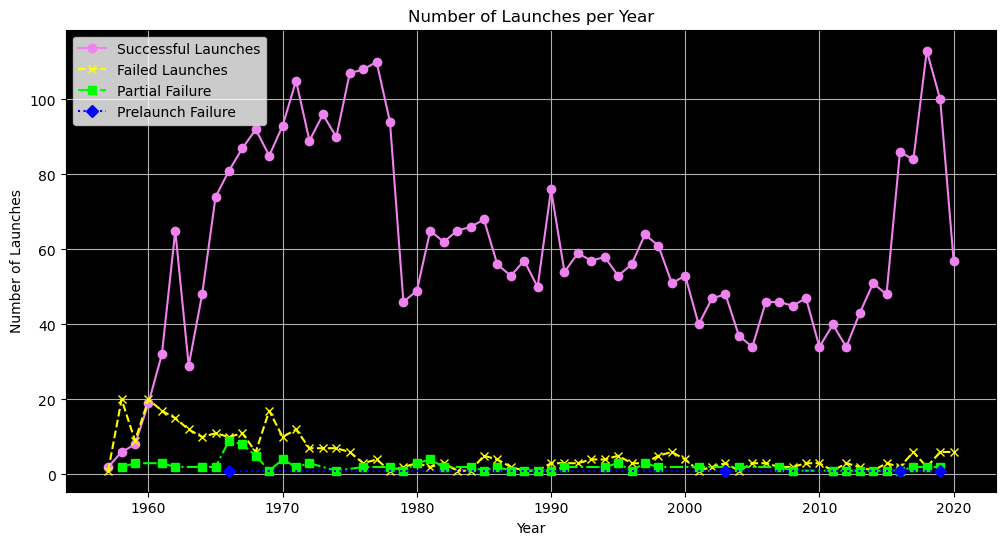

In [4]:
successful_launches = mission_launches_cleaned[mission_launches_cleaned['Mission_Status'] == 'Success']
failed_launches = mission_launches_cleaned[mission_launches_cleaned['Mission_Status'] == 'Failure']
partial_failure_launches = mission_launches_cleaned[mission_launches_cleaned['Mission_Status'] == 'Partial Failure']
prelaunch_failure_launches = mission_launches_cleaned[mission_launches_cleaned['Mission_Status'] == 'Prelaunch Failure']

successful_by_year = successful_launches.groupby('Year').size()
failed_by_year = failed_launches.groupby('Year').size()
partial_failure_by_year = partial_failure_launches.groupby('Year').size()
prelaunch_failure_by_year = prelaunch_failure_launches.groupby('Year').size()

success_color = 'violet'
failure_color = 'yellow'
partial_failure_color = 'lime'
prelaunch_failure_color = 'blue'

plt.figure(figsize=(12, 6))
plt.plot(successful_by_year.index, successful_by_year.values, label='Successful Launches', marker='o', color=success_color)
plt.plot(failed_by_year.index, failed_by_year.values, label='Failed Launches', linestyle='--', marker='x', color=failure_color)
plt.plot(partial_failure_by_year.index, partial_failure_by_year.values, label='Partial Failure', linestyle='-.', marker='s', color=partial_failure_color)
plt.plot(prelaunch_failure_by_year.index, prelaunch_failure_by_year.values, label='Prelaunch Failure', linestyle=':', marker='D', color=prelaunch_failure_color)

plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Year')
plt.legend()
plt.grid(True)

plt.gca().set_facecolor('black')

plt.savefig(r'C:\Users\photo\Desktop\Ironhack\projects\project_II_space_mission_launches\images/plt_mission_status.png')
plt.show()

## Price in Millions spent by Agency

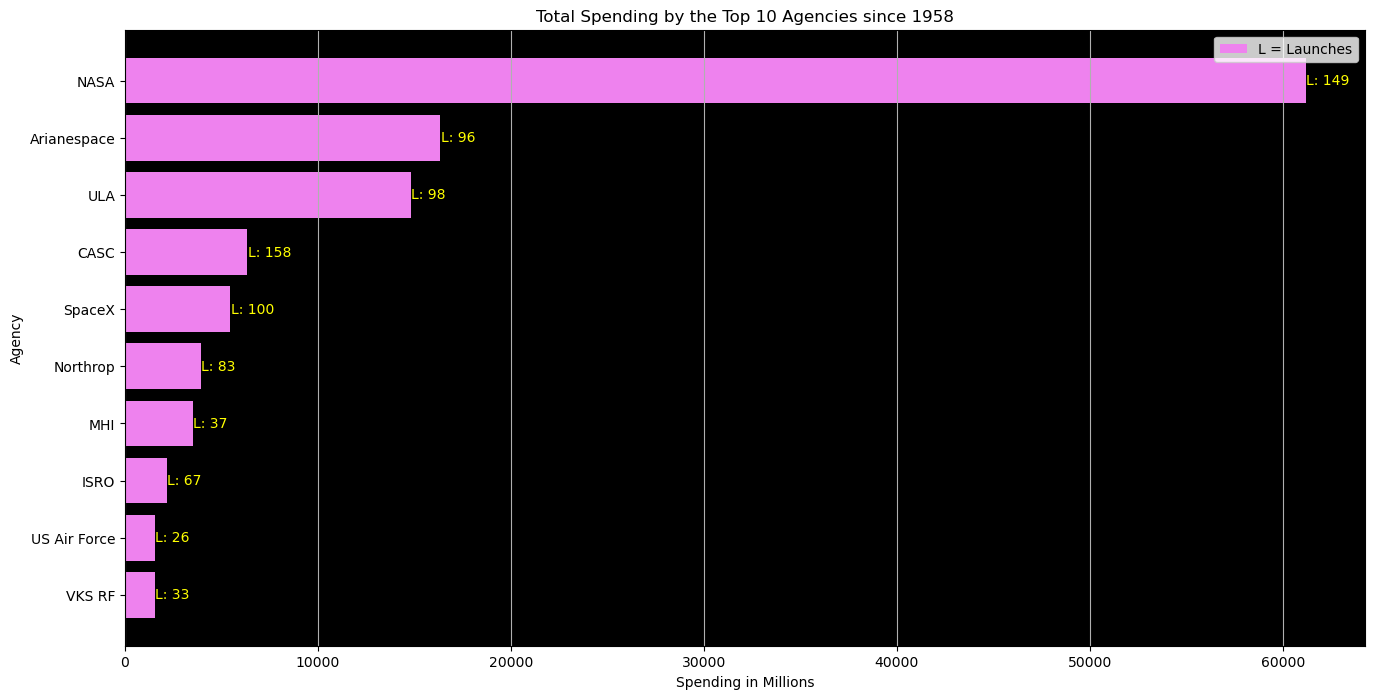

In [5]:
filtered_df = mission_launches_cleaned.dropna(subset=['Price in Millions'])
filtered_df = filtered_df.copy()  # Make a copy of the DataFrame
filtered_df['Price in Millions'] = pd.to_numeric(filtered_df['Price in Millions'], errors='coerce')

budget_per_agency = filtered_df.groupby("Agency")["Price in Millions"].sum().reset_index()

launch_count = filtered_df['Agency'].value_counts().reset_index()
launch_count.columns = ['Agency', 'Launch Count']

budget_per_agency = budget_per_agency.sort_values(by="Price in Millions", ascending=True)

last_10_agencies = budget_per_agency.tail(10)

plt.figure(figsize=(16, 8))
bars = plt.barh(last_10_agencies['Agency'], last_10_agencies['Price in Millions'], color='violet')
plt.xlabel('Spending in Millions')
plt.ylabel('Agency')
plt.title('Total Spending by the Top 10 Agencies since 1958')
plt.gca().set_facecolor('white')

for i in range(len(last_10_agencies)):
    agency = last_10_agencies.iloc[i, 0]
    launch_count_value = launch_count.loc[launch_count['Agency'] == agency, 'Launch Count'].values[0]
    text_x = last_10_agencies.iloc[i, 1] + 10
    text_y = i  
    plt.text(text_x, text_y, f'L: {launch_count_value}', va='center', color='yellow')
    plt.legend(["L = Launches"], loc="upper right", labelcolor="black")

plt.grid(axis='x')
plt.gca().set_facecolor('black')
plt.savefig(r'C:\Users\photo\Desktop\Ironhack\projects\project_II_space_mission_launches\images/total_spending.png')
plt.show()

## NASA BUDGET PER YEARS

In [6]:
budget_nasa= pd.read_csv(r"C:\Users\photo\Desktop\Ironhack\projects\project_II_space_mission_launches\data\budget_nasa_2022_cleaned.csv")
budget_nasa.head()

,Unnamed: 0,Year,Budget Request,Authorized Budget,Goverment Employees
0,0,2018,19.092,20.736,"17,551[190]"
1,1,2019,19.892,21.500,"17,551[192]"
2,2,2020,22.613,22.629,"18,048[194]"
3,3,2021,25.246,23.271,"18,339[196]"
4,4,2022,24.802,24.041,"18,400 est"


In [7]:
budget_nasa['Year'] = budget_nasa['Year'].astype(str)

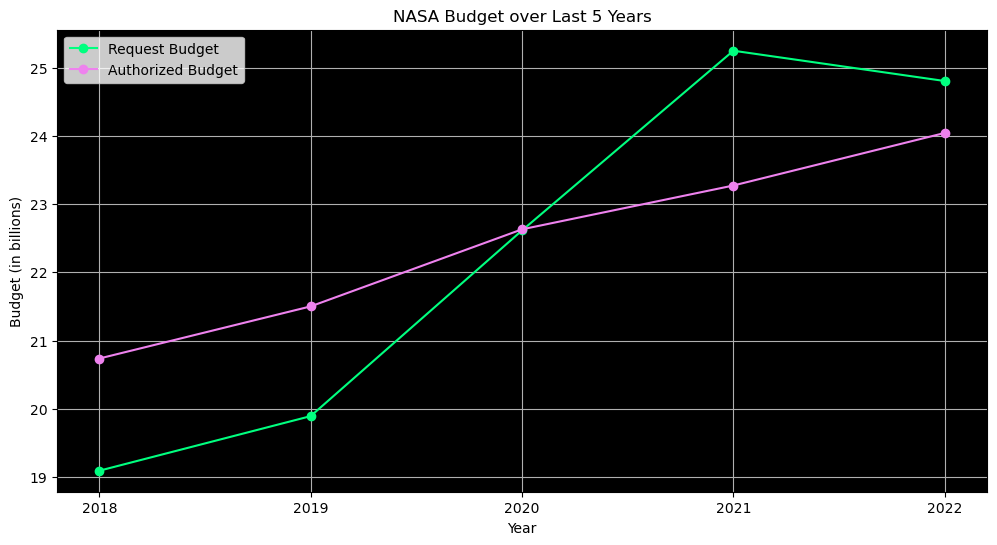

In [8]:
filtered_budget_nasa = budget_nasa[~budget_nasa['Year'].isin([2018, 2018.5])]

plt.figure(figsize=(12, 6))
plt.plot(filtered_budget_nasa['Year'], filtered_budget_nasa['Budget Request'], marker='o', label='Request Budget', color='springgreen')
plt.plot(filtered_budget_nasa['Year'], filtered_budget_nasa['Authorized Budget'], marker='o', label='Authorized Budget', color='violet')

plt.xlabel('Year')
plt.ylabel('Budget (in billions)')
plt.title('NASA Budget over Last 5 Years')
plt.legend()

plt.gca().set_facecolor('black')
plt.grid(True)
plt.savefig(r'C:\Users\photo\Desktop\Ironhack\projects\project_II_space_mission_launches\images/nasa_budget_yearly.png')
plt.show()

## NASA BUDGET PER YEARS

In [9]:
launches_nasa= pd.read_csv(r"C:\Users\photo\Desktop\Ironhack\projects\project_II_space_mission_launches\data\launches_nasa_2022_cleaned.csv")
launches_nasa.head()

,Unnamed: 0,Month,Successes,Failures,Partial Failures
0,0,January,8,0,0
1,1,February,12,1,0
2,2,March,12,0,0
3,3,April,14,0,0
4,4,May,11,1,0


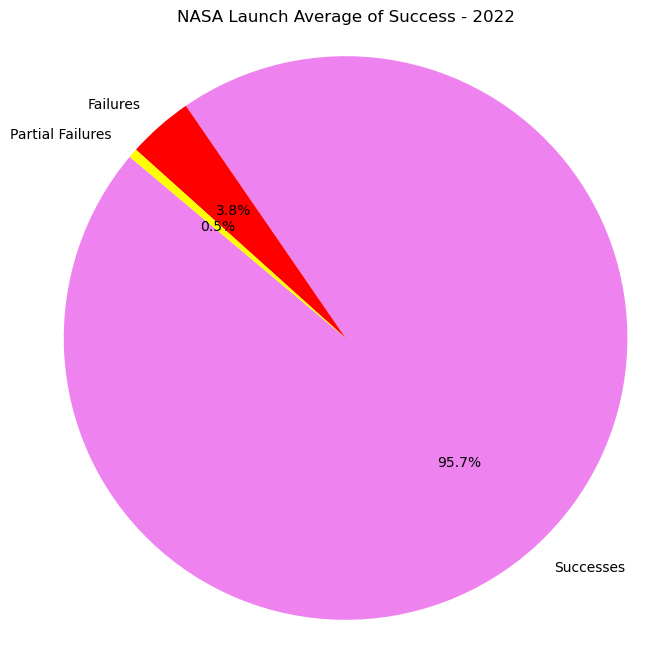

In [10]:
total_success = launches_nasa['Successes'].sum()
total_failures = launches_nasa['Failures'].sum()
total_partial_failures = launches_nasa['Partial Failures'].sum()

outcome_counts = [total_success, total_failures, total_partial_failures]
labels = ['Successes', 'Failures', 'Partial Failures']
colors = ['violet', 'red', 'yellow']

plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('NASA Launch Average of Success - 2022')

plt.axis('equal')  
plt.savefig(r'C:\Users\photo\Desktop\Ironhack\projects\project_II_space_mission_launches\images/nasa_launch_average.png')
plt.show()